# Online Payment Fraud Detection

Data Source: /https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection/data

### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

### Ignores all warning messages

In [2]:
warnings.filterwarnings("ignore")

### Reading the csv file

In [3]:
df = pd.read_csv("onlinefraud.csv")
# Displaying top 5 rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Dispalying rows and columns
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.head().T

,0,1,2,3,4
step,1,1,1,1,1
type,PAYMENT,PAYMENT,TRANSFER,CASH_OUT,PAYMENT
amount,9839.64,1864.28,181.0,181.0,11668.14
nameOrig,C1231006815,C1666544295,C1305486145,C840083671,C2048537720
oldbalanceOrg,170136.0,21249.0,181.0,181.0,41554.0
newbalanceOrig,160296.36,19384.72,0.0,0.0,29885.86
nameDest,M1979787155,M2044282225,C553264065,C38997010,M1230701703
oldbalanceDest,0.0,0.0,0.0,21182.0,0.0
newbalanceDest,0.0,0.0,0.0,0.0,0.0
isFraud,0,0,1,1,0


## Data Cleaning

In [8]:
# Displaying datatypes
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [9]:
# Converting datatypes from objects
df = df.convert_dtypes()
df.dtypes

step                       Int64
type              string[python]
amount                   Float64
nameOrig          string[python]
oldbalanceOrg            Float64
newbalanceOrig           Float64
nameDest          string[python]
oldbalanceDest           Float64
newbalanceDest           Float64
isFraud                    Int64
isFlaggedFraud             Int64
dtype: object

#### Analysing missing values

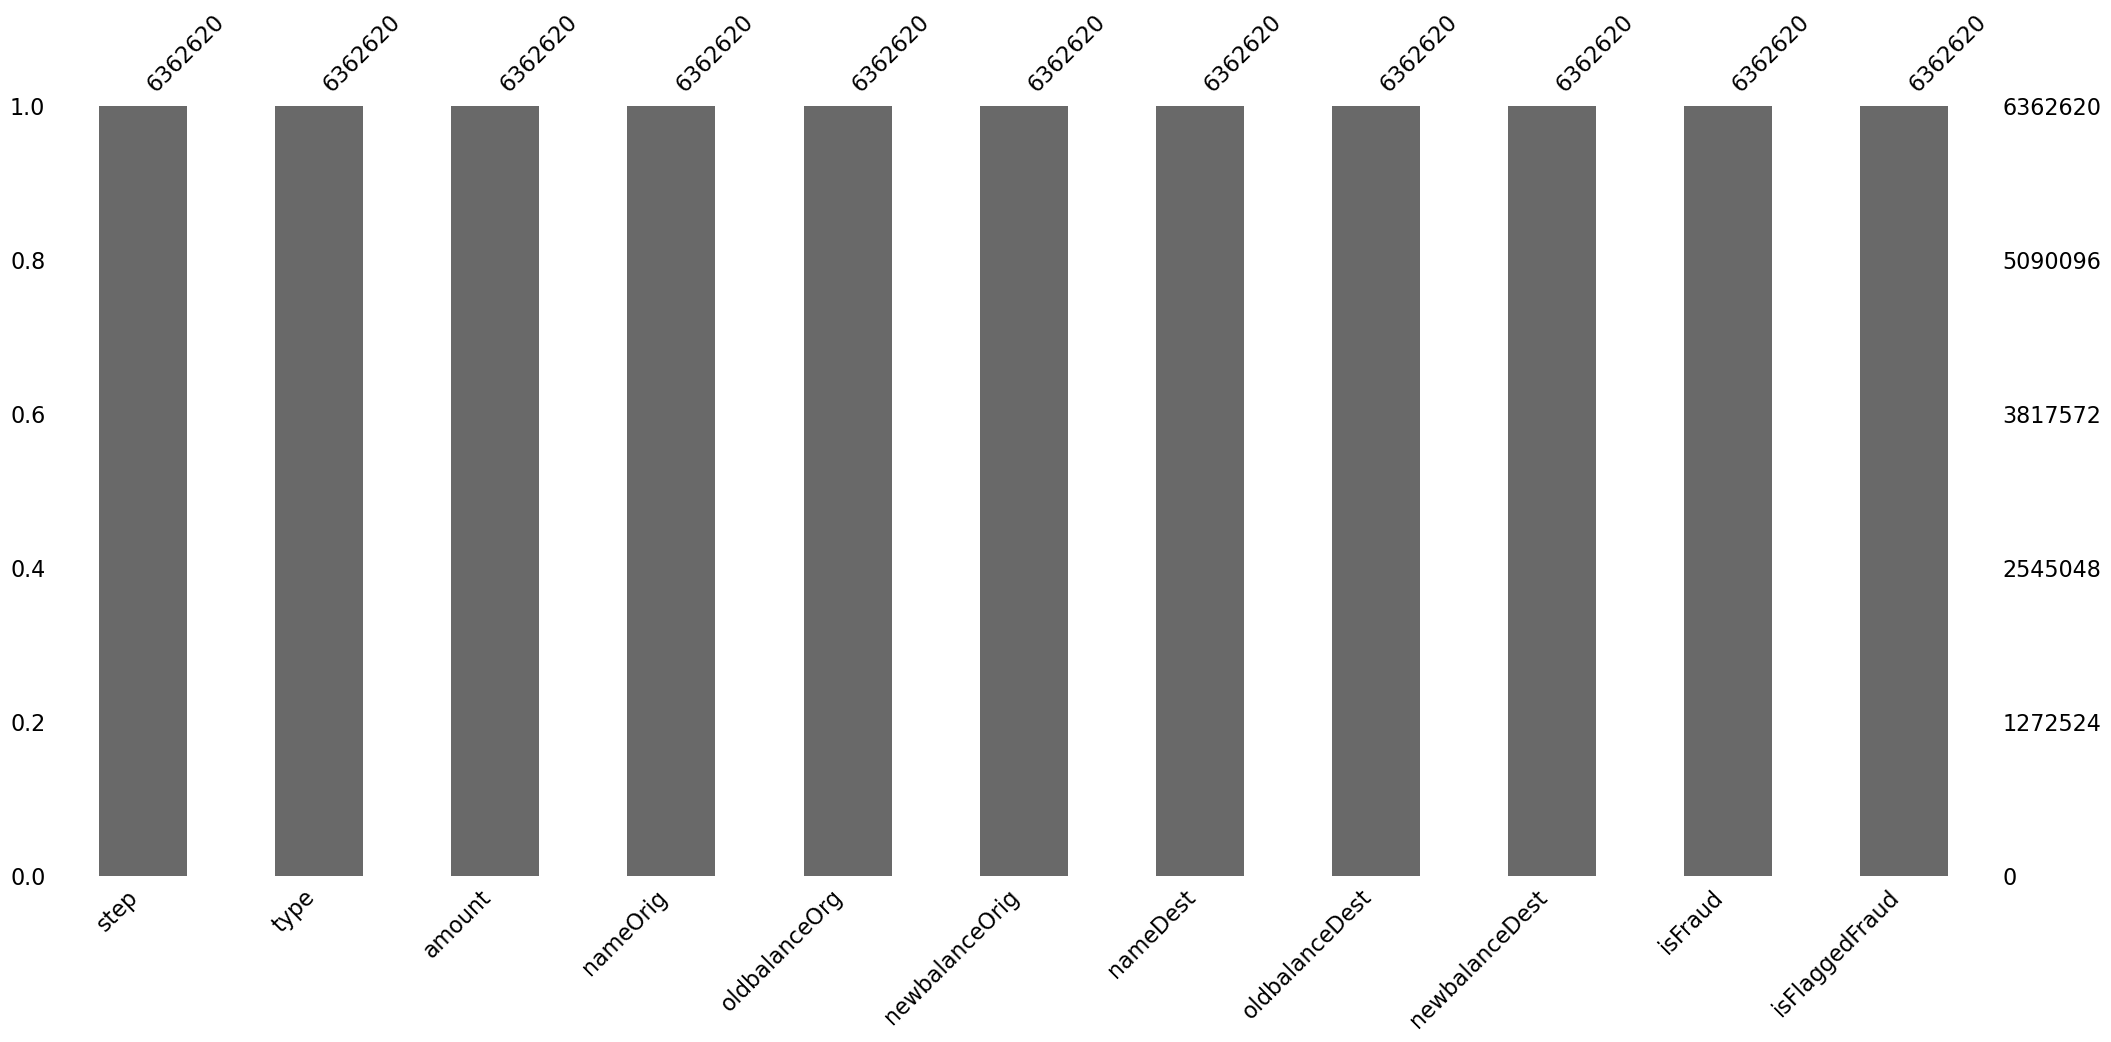

In [10]:
# Displaying missing values
msno.bar(df)
plt.show()

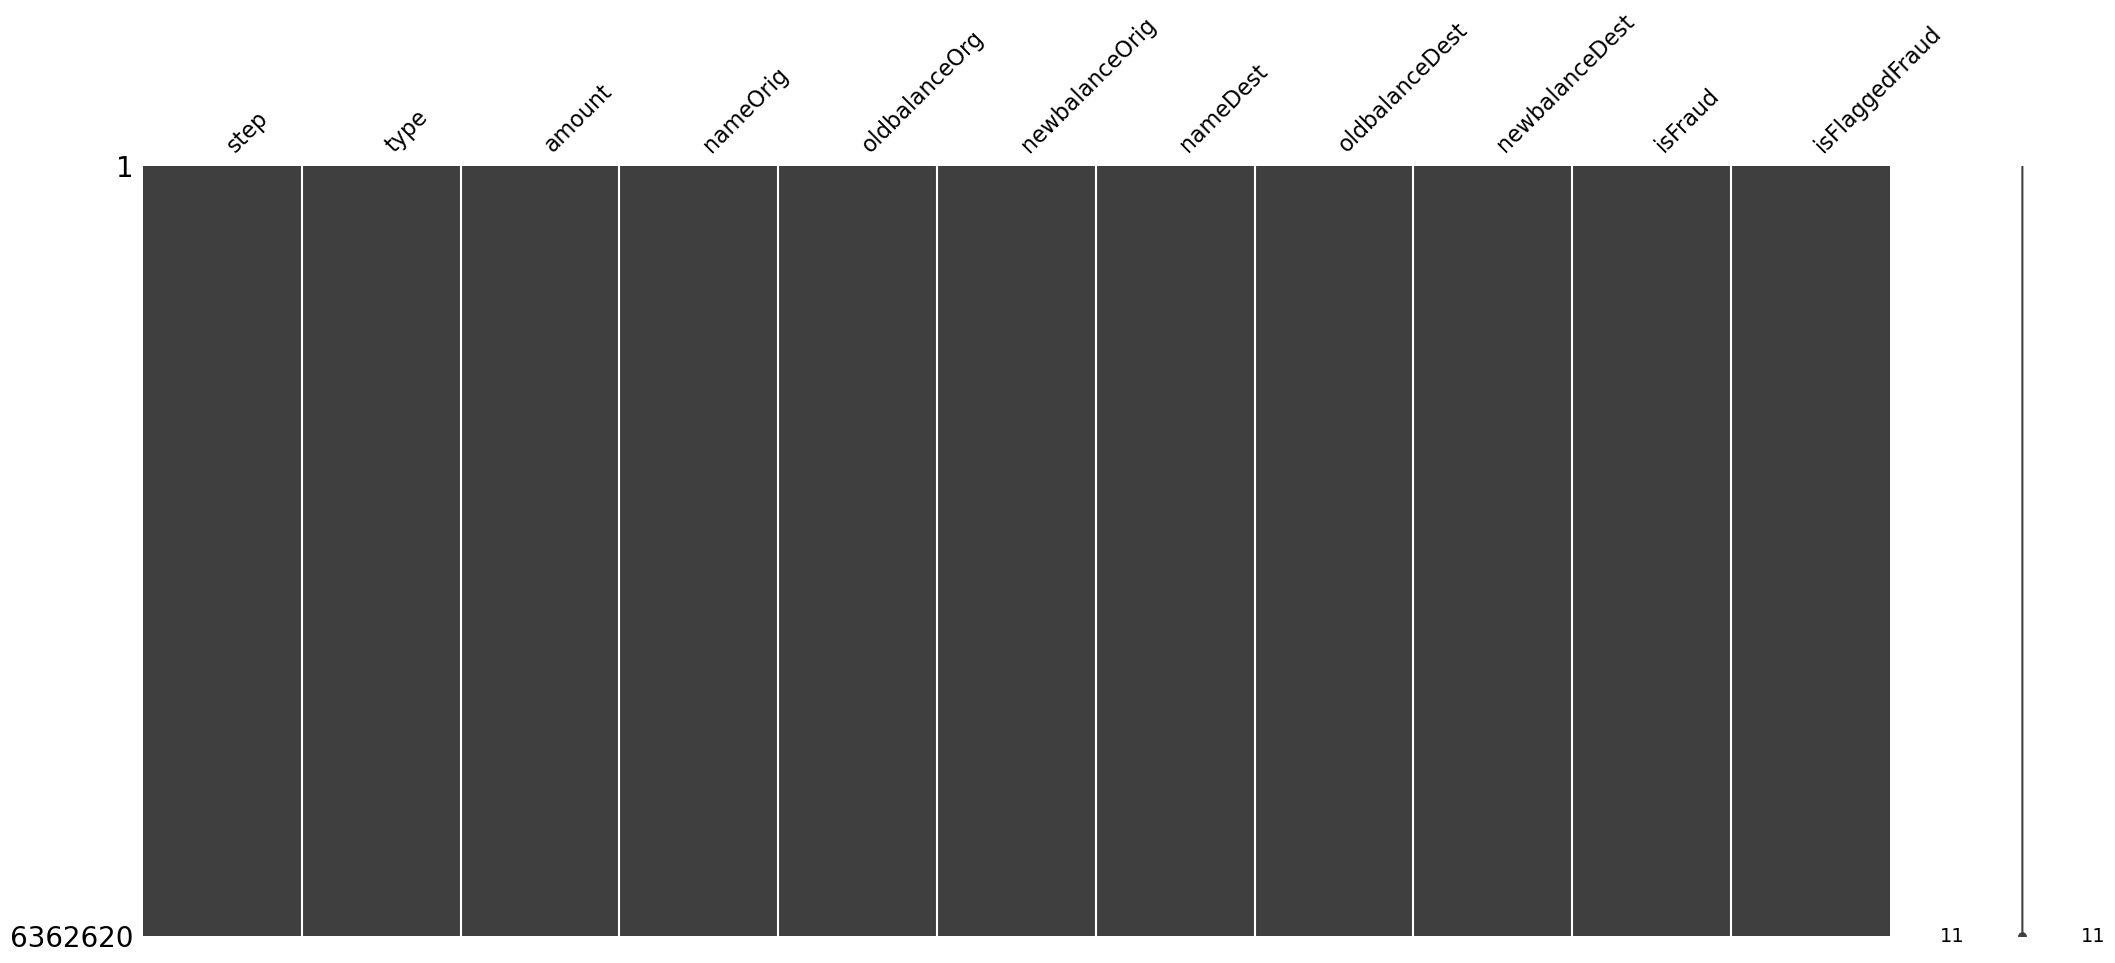

In [11]:
# Displaying missing values
msno.matrix(df)
plt.show()

In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Checking for outliers

<Axes: >

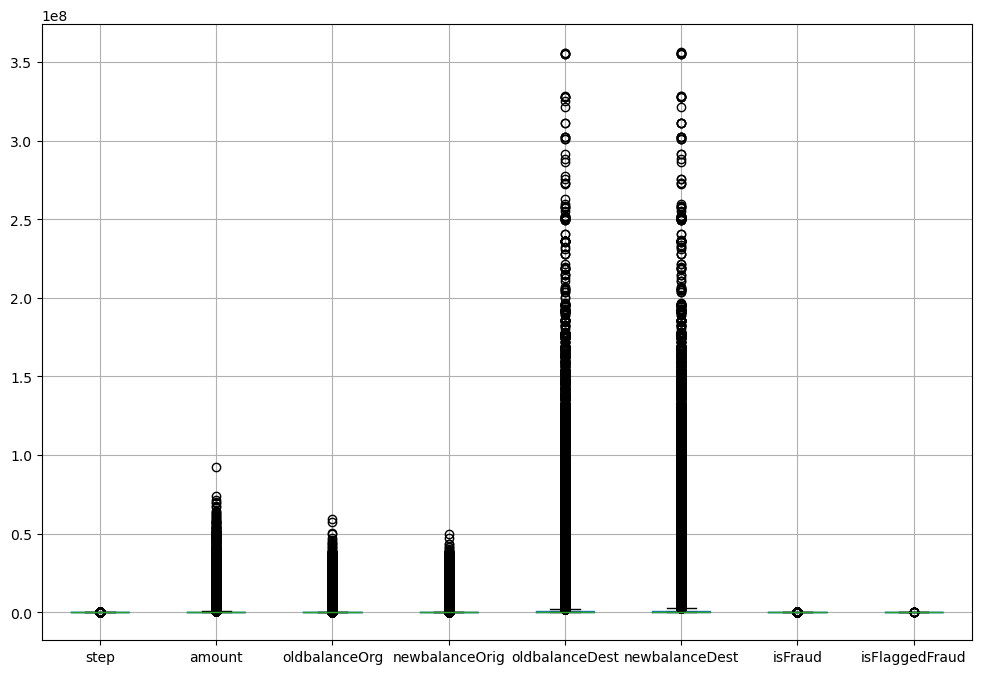

In [13]:
plt.figure(figsize=(12,8))
df.boxplot()

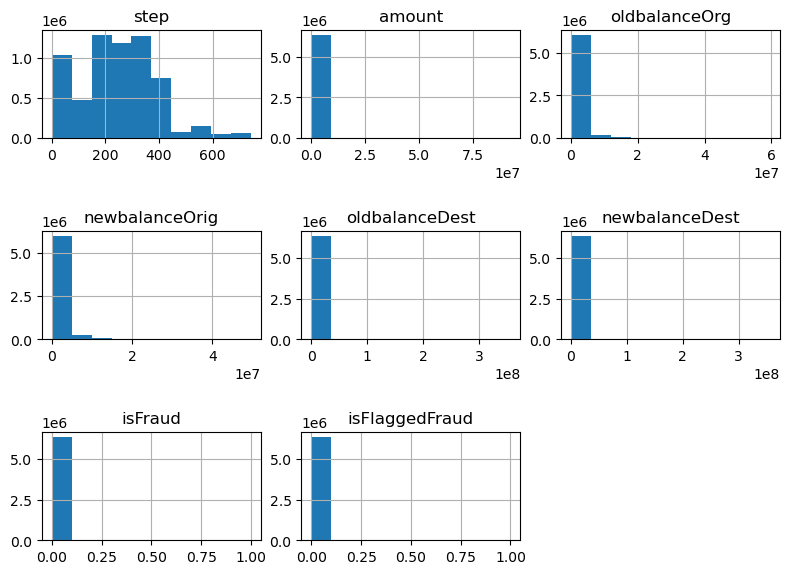

In [14]:
ig, ax = plt.subplots(1, 1, figsize=(8, 6))
df.hist(ax=ax)
plt.tight_layout()
plt.show()

## Exploratory Data Analysis

> There are very few fraud identified transactions. There is high chances of imbalance class so need to balance the classes using oversampling or undersampling.

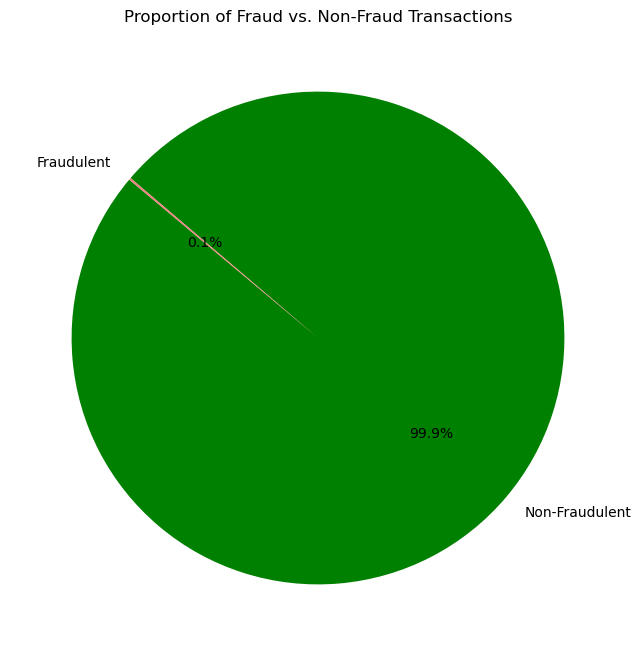

In [15]:
fraud_counts = df['isFraud'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(fraud_counts, labels=['Non-Fraudulent', 'Fraudulent'], autopct='%1.1f%%', colors=['green', 'lightcoral'], startangle=140)
plt.title('Proportion of Fraud vs. Non-Fraud Transactions')
plt.show()  # Display the plot


> There are very few fraud identified transactions. There is high chances of imbalance class so need to balance the classes using oversampling or undersampling.

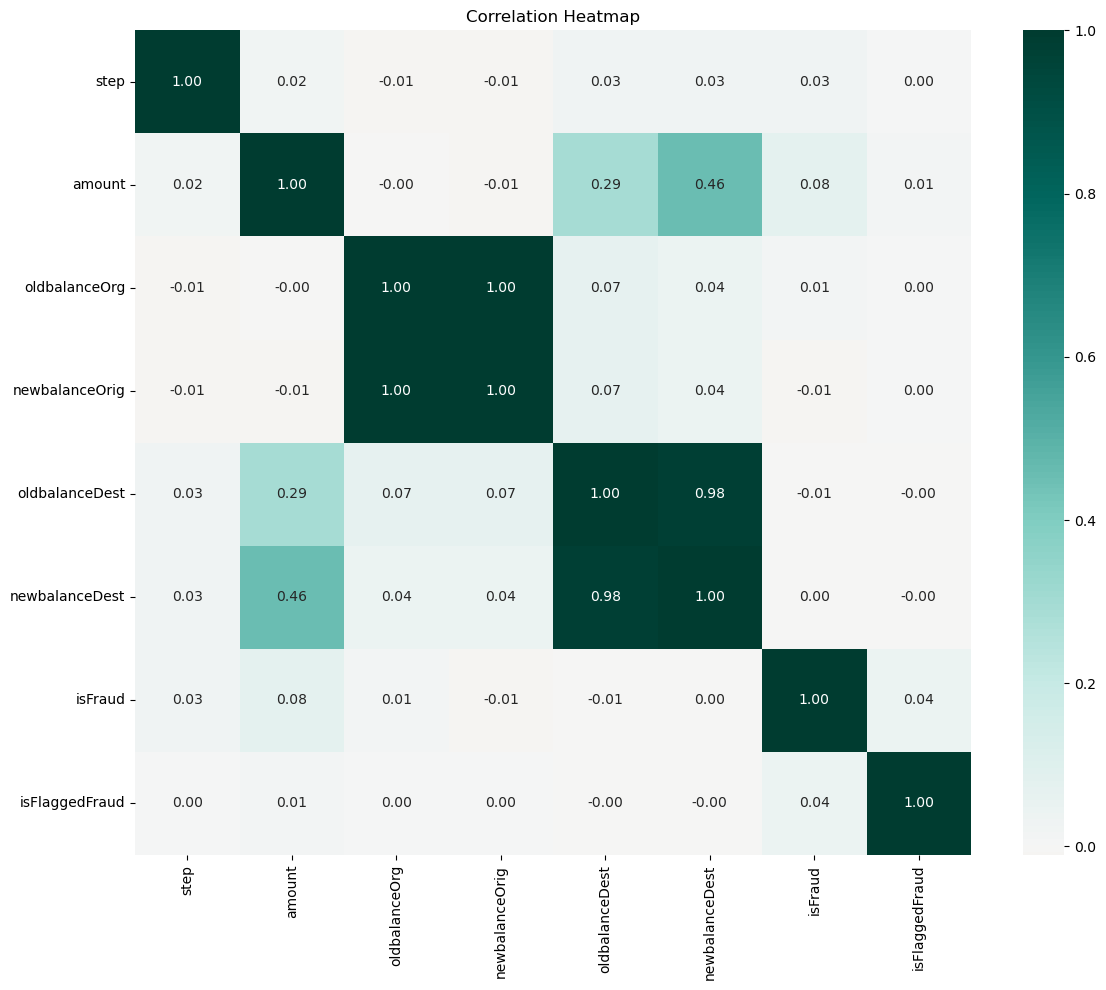

In [16]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='BrBG', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

> There is a strong corelation between newbalanceOrg and oldbalanceOrg

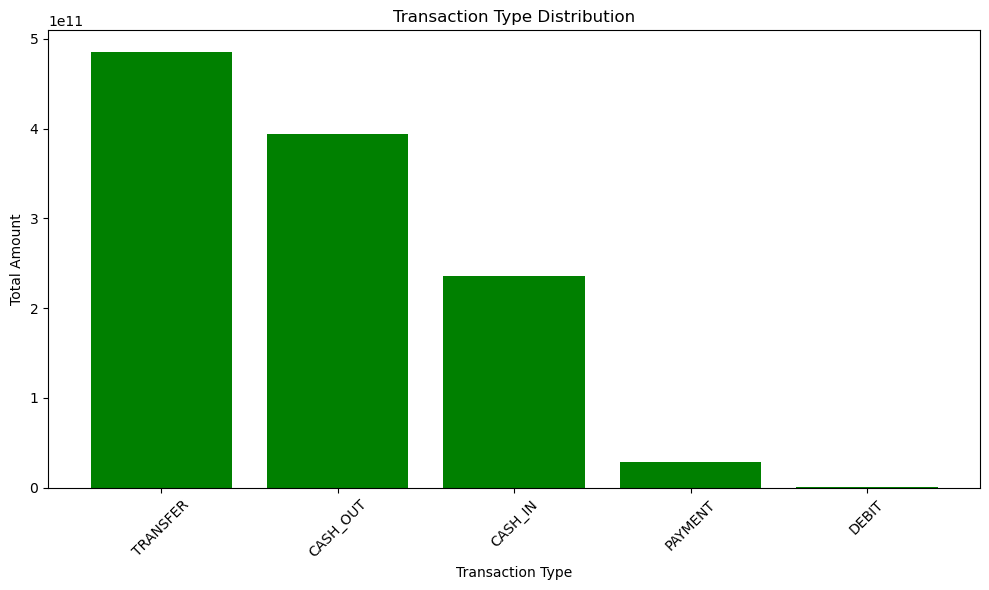

In [17]:
grouped_df = df.groupby('type')['amount'].sum().reset_index()
sorted_grouped_df = grouped_df.sort_values('amount', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))  # You can adjust the figure size to your liking
plt.bar(sorted_grouped_df['type'], sorted_grouped_df['amount'], color='green')

# Customize the chart
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


> 'Transfer' type of transaction has maximum amount of amount processed. Least amount of transaction happend on 'Debit'.

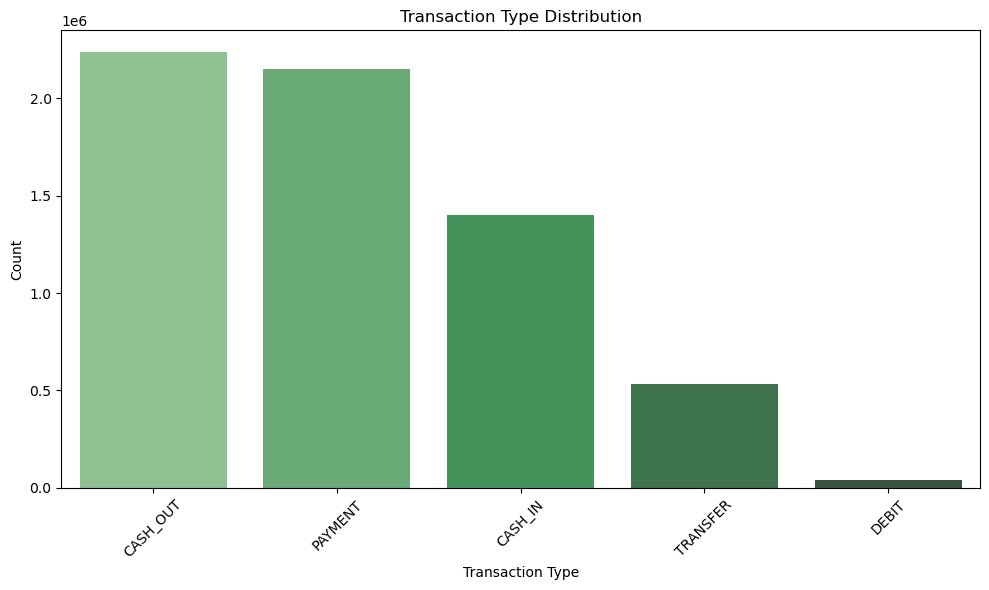

In [18]:
transaction_type_counts = df['type'].value_counts()

# Convert the Series to a DataFrame for plotting
transaction_type_counts_df = transaction_type_counts.reset_index()
transaction_type_counts_df.columns = ['Transaction Type', 'Count']

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(data=transaction_type_counts_df, x='Transaction Type', y='Count', palette='Greens_d')

# Customize the chart
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust subplot params so the plot fits into the figure area
plt.show()


> 'Cash_out' type of transaction has maximum count of amount processed. Least number of transaction happend on 'Debit'.

### Analysing which of Transaction has Fraud transactions

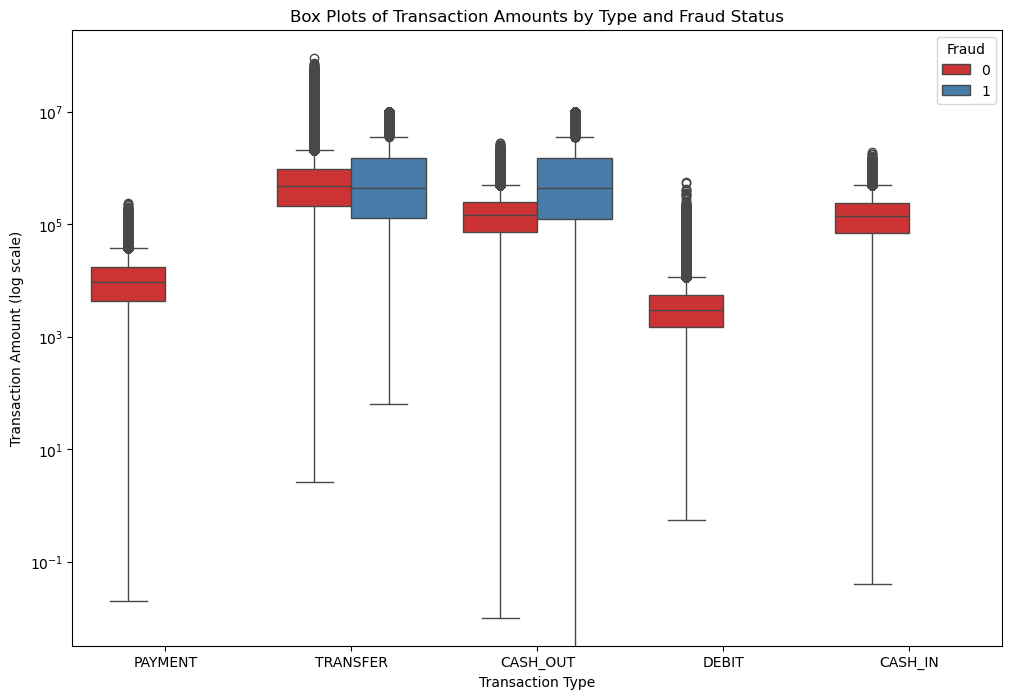

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='amount', data=df, hue='isFraud', palette='Set1')
plt.yscale('log')
plt.title('Box Plots of Transaction Amounts by Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount (log scale)')
plt.legend(title='Fraud', loc='upper right')
plt.show()

> There are five types of transactions named Payment, Transfer, Cash_out, Debit and Cash_in. In this only 'Transfer' and 'Cash_out' have fraud transactions.

In [20]:
Result = pd.crosstab(index=df.type,columns=df.isFraud)
Result

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [21]:
transfer_total = 528812+4097
transfer_fraud = 4097/(transfer_total) * 100
transfer_fraud

0.7687991758442811

In [22]:
cashout_total=2233384+4116
cashout_fraud= 4116/(cashout_total) * 100
cashout_fraud

0.18395530726256984

> 76% of the fraud transactions happened in 'Transfer' and 18% of the fraud transactions happened in 'Cash_out'.

## Calculating the % of Fraud transactions

In [23]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: Int64

In [24]:
isFraud_flagged_fraud_records = df[(df.isFraud==1) & (df.isFlaggedFraud==1)]
isFraud_flagged_fraud_records

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.0,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.1,C193696150,3576297.1,3576297.1,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.0,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [25]:
isFraud_flagged_fraud_records.shape

(16, 11)

In [26]:
total_fraud= df[df.isFlaggedFraud ==1]
total_fraud = total_fraud.shape[0]
total_fraud

16

In [27]:
total_fraud= df[df.isFraud ==1]
total_fraud = total_fraud.shape[0]
total_fraud

8213

In [28]:
total_isflaggedFraud= isFraud_flagged_fraud_records.shape[0]
total_isflaggedFraud

16

In [29]:
flagged_percent = total_isflaggedFraud/total_fraud * 100
print('Percentage of flagged fraud: ',round(flagged_percent,3))

unflagged_percent= (total_fraud-total_isflaggedFraud)/total_fraud * 100
print('Percentage of incorrectly flagged fraud: ',round(unflagged_percent,3))

Percentage of flagged fraud:  0.195
Percentage of incorrectly flagged fraud:  99.805


> The data reveals a critical challenge in fraud detection, with a mere 0.195% of transactions correctly identified as fraud, against a high 99.805% of transactions that were incorrectly flagged as fraudulent. This significant imbalance suggests the fraud detection mechanism is overly cautious, producing a vast number of false positives. Such inefficiency could strain resources, erode customer trust, and diminish user experience due to unwarranted scrutiny on legitimate transactions.

## Fraud amount

In [30]:
total_transactions = df.shape[0]
fraud_transaction = df[df.isFraud==1].shape[0]
fraud_percent= fraud_transaction/total_transactions * 100
fraud_percent

0.12908204481801522

In [31]:
print('Total transactions: ',total_transactions)
print('Total fraud transactions happened: ',fraud_transaction)
print("Total fraud transaction percent: ",round(fraud_percent,2))

Total transactions:  6362620
Total fraud transactions happened:  8213
Total fraud transaction percent:  0.13


In [32]:
fraud_amount= df[df.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3760283,279,CASH_OUT,10000000.0,C1214015158,10000000.0,0.0,C2110157840,0.0,10000000.0,1,0
5987587,409,CASH_OUT,10000000.0,C97242201,10000000.0,0.0,C786701128,8496.86,10008496.86,1,0
1707592,160,CASH_OUT,10000000.0,C525906402,10000000.0,0.0,C43869769,2145275.47,12145275.47,1,0
1707591,160,TRANSFER,10000000.0,C752627210,27670038.08,17670038.08,C1853789265,0.0,0.0,1,0
1707590,160,CASH_OUT,10000000.0,C2068007279,10000000.0,0.0,C836488544,158643.25,10158643.25,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.9,76759.9,1,0
6362461,730,CASH_OUT,0.0,C729003789,0.0,0.0,C1388096959,1008609.53,1008609.53,1,0
6362463,730,CASH_OUT,0.0,C2088151490,0.0,0.0,C1156763710,0.0,0.0,1,0


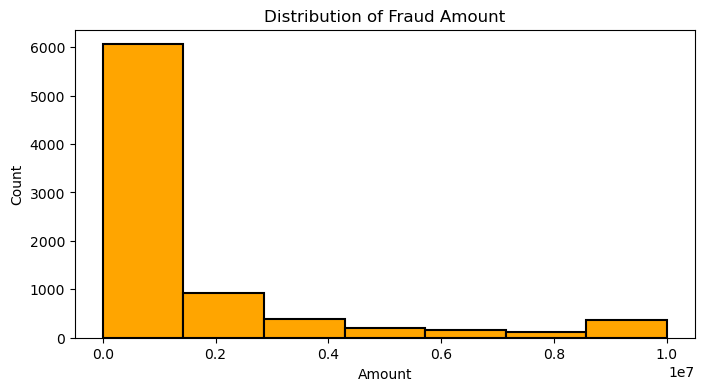

In [33]:
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed (width, height) in inches
plt.hist(fraud_amount['amount'], bins=7, color='orange', edgecolor='black', linewidth=1.5)

# Customize the histogram
plt.title('Distribution of Fraud Amount')
plt.xlabel('Amount')
plt.ylabel('Count')

# Show the plot
plt.show()


> Most of the fraud transaction amount is in between 1 million.

## Calculating max frequency of Steps 

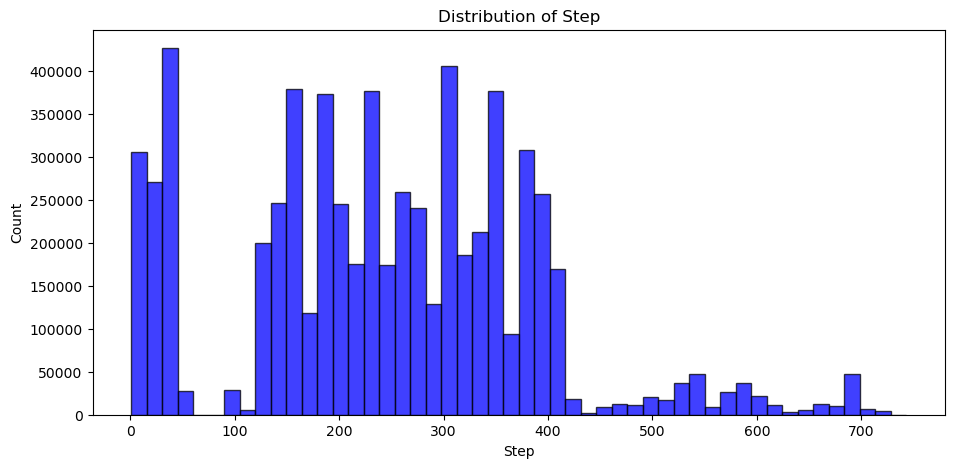

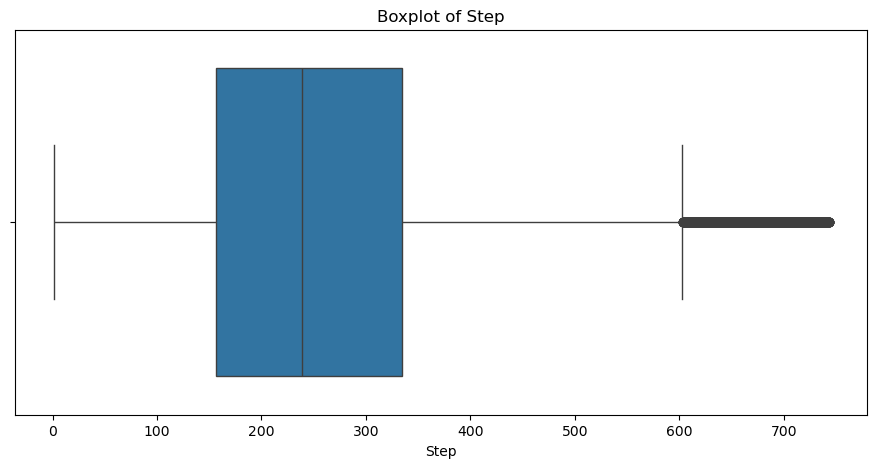

In [34]:
plt.figure(figsize=(11, 5))  # Adjust the figure size as needed
plt.hist(df['step'], bins=50, alpha=0.75, color='blue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Step')
plt.xlabel('Step')
plt.ylabel('Count')

# Show the histogram
plt.show()

# Create a separate boxplot
plt.figure(figsize=(11, 5))  # Adjust the figure size as needed
sns.boxplot(x=df['step'])

# Add titles and labels
plt.title('Boxplot of Step')
plt.xlabel('Step')

# Show the boxplot
plt.show()


> Maximum distribution are between 150 to 350
of step.